# Análise de Sentimento em avaliações da <i> Amazon.com </i>

### <i>  Objetivo: Identificar a polaridade (positivo ou negativo) e prever o star rating dos comentários (1 a 5 estrelas). </i>


# Dataset

<i> Para o desenvolvimento dessa atividade irei utilizar um dos datasets de avaliações dos clientes da Amazon, disponível nesse [link](https://registry.opendata.aws/amazon-reviews/). Obtei por explorar os dados relacionados a <b> "Major Appliances" </b>(eletrodomésticos).

In [2]:
# Bibliotecas necessárias inicialmente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

sns.set_style('white')

%matplotlib inline

In [3]:
# Edita as opções de visualização das tabelas do pandas, desse modo os textos maiores não ficam com (...) no final das sentenças
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [4]:
# Lendo a base com os comentários
reviews_full = pd.read_table('amazon_reviews_us_Major_Appliances_v1_00.tsv', sep = '\t', error_bad_lines=False)
reviews_full.head()

b'Skipping line 5583: expected 15 fields, saw 22\nSkipping line 22814: expected 15 fields, saw 22\nSkipping line 22883: expected 15 fields, saw 22\nSkipping line 29872: expected 15 fields, saw 22\nSkipping line 37242: expected 15 fields, saw 22\nSkipping line 59693: expected 15 fields, saw 22\n'


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,16199106,R203HPW78Z7N4K,B0067WNSZY,633038551,"FGGF3032MW Gallery Series 30"" Wide Freestanding Gas Range 5 Sealed Burners Easy Temperature Probe Express-Select Controls One-Touch Self Clean:",Major Appliances,5,0,0,N,Y,"If you need a new stove, this is a winner.",What a great stove. What a wonderful replacement for my sort of antique. Enjoy it every day.,2015-08-31
1,US,16374060,R2EAIGVLEALSP3,B002QSXK60,811766671,Best Hand Clothes Wringer,Major Appliances,5,1,1,N,Y,Five Stars,worked great,2015-08-31
2,US,15322085,R1K1CD73HHLILA,B00EC452R6,345562728,Supco SET184 Thermal Cutoff Kit,Major Appliances,5,0,0,N,Y,Fast Shipping,Part exactly what I needed. Saved by purchasing myself.,2015-08-31
3,US,32004835,R2KZBMOFRMYOPO,B00MVVIF2G,563052763,"Midea WHS-160RB1 Compact Single Reversible Door Refrigerator and Freezer, 4.4 Cubic Feet, Black",Major Appliances,5,1,1,N,Y,Five Stars,Love my refrigerator! ! Keeps everything cold..will recommend!,2015-08-31
4,US,25414497,R6BIZOZY6UD01,B00IY7BNUW,874236579,Avalon Bay Portable Ice Maker,Major Appliances,5,0,0,N,Y,Five Stars,No more running to the store for ice! Works perfectly.,2015-08-31


In [5]:
# Verificando a quantidade de linhas e colunas disponiveis no dataset
reviews_full.shape

(96834, 15)

### Metadados


- **Marketplace** - 2 letras do código do país de mercado em que o comentário foi escrito;

- **Customer_id**	 - Identificador aleatório que pode ser usado para agregar comentários escritas por um único autor;

- **Review_id** - Identificador exclusivo do comentário;

- **Product_id** - Identificador do produto ao qual o comentário pertence. No conjunto de dados multilíngue, os comentários para o mesmo produto em diferentes países podem ser agrupados pelo mesmo product_id;

- **Product_parent** - Identificador aleatório que pode ser usado para agregar comentários para o mesmo produto;

- **Product_title** - Título do produto;

- **Product_category** - Categoria de produto que pode ser usada para agrupar comentários (também usado para agrupar o conjunto de dados em partes coerentes);

- **Star_rating** - A classificação de 1 a 5 estrelas do comentário;

- **Helpful_votes** - Número de votos úteis que o comentário recebeu;

- **Total_votes** - Número total de votos que o comentário recebeu;

- **Vine** - O comentário foi escrito como parte do "Vine Program";

- **Verified_purchase** - O comentário está em uma compra verificada;

- **Veview_headline** - O título do comentário;

- **Review_body** - O texto com o comentário;

- **Review_date**	 - A data em que o comentário foi escrito.

# Análise de dados exploratória

### Tipo dos dados 

In [6]:
# Verificando o tipo dos dados 
reviews_full.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

### Valores missing

<i> Para evitar erros, irei apagar todas as linhas em que informações de texto tenham valores missing </i>

In [7]:
# Verifica se existe alguma coluna com valor nulo no dataset
reviews_full.isnull().any()

marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title        False
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline       True
review_body           True
review_date           True
dtype: bool

<i> Nesse caso, os campos <b> review_headline, review_body e review_date </b> possuem valores missing </i>

In [8]:
# Drop nas linhas que possuem valores nulos
reviews_full = reviews_full.dropna(subset=['review_headline'])
reviews_full = reviews_full.dropna(subset=['review_body'])
reviews_full = reviews_full.dropna(subset=['review_date'])

In [9]:
# Verificando a quantidade de linhas disponiveis depois das exclusão de algumas linhas (9 linhas foram excluidas)
reviews_full.shape

(96825, 15)

### Distribuição do <i> "star_rating"</i>

Text(0.5,1,'Star Rating')

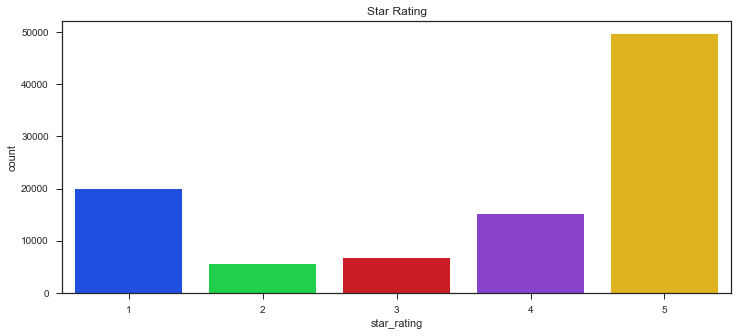

In [10]:
# Distribuição da coluna star_rating
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style('ticks')
sns.countplot(x='star_rating', data=reviews_full, palette='bright')
plt.title("Star Rating")

### Quantidade de caracteres do titulo e dos comentários 

In [11]:
# Inclui uma coluna com a quantidade de caracteres do titulo e do comentário
reviews_full['length_headline'] = reviews_full['review_headline'].apply(len)
reviews_full['length_body'] = reviews_full['review_body'].apply(len)

reviews_full[['review_body', 'star_rating', 'length_body']].head(6)

,review_body,star_rating,length_body
0,What a great stove. What a wonderful replacement for my sort of antique. Enjoy it every day.,5,94
1,worked great,5,12
2,Part exactly what I needed. Saved by purchasing myself.,5,56
3,Love my refrigerator! ! Keeps everything cold..will recommend!,5,63
4,No more running to the store for ice! Works perfectly.,5,55
5,It would not cool below 55 degrees and has now stopped working all together. I would NOT recommend this piece of junk to anyone.,1,129


#### Distriuição do total de caracteres do titulo

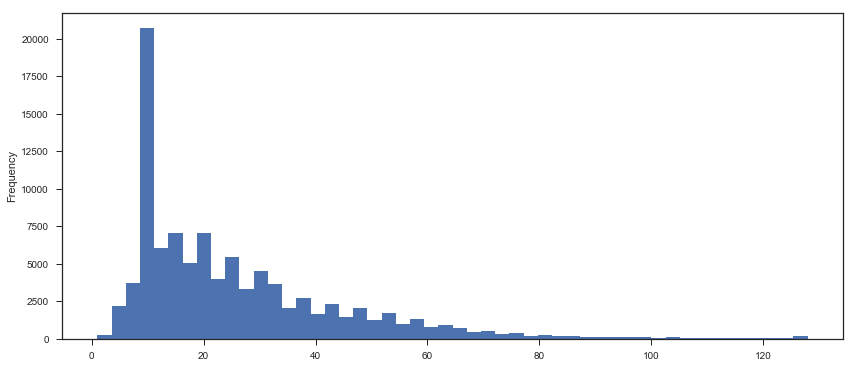

In [12]:
reviews_full['length_headline'].plot(bins=50, kind='hist', figsize=(14,6)) 

#### Distriuição do total de caracteres do comentário

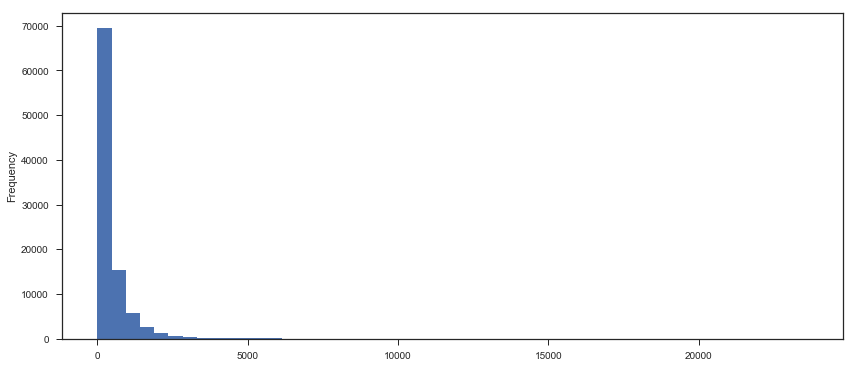

In [13]:
reviews_full['length_body'].plot(bins=50, kind='hist', figsize=(14,6)) 

### Quantidade de caracteres do titulo e dos comentários x Star_Rating

#### Distriuição da quantidade de caracteres x star_rating -> Titulo </i>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAE9FF85F8>,
      dtype=object)

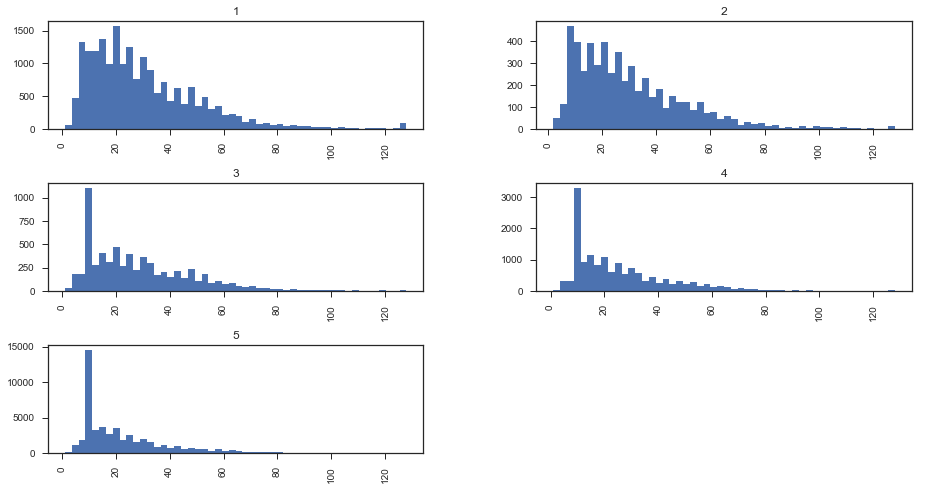

In [14]:
reviews_full.hist(column='length_headline', by='star_rating', bins=50, figsize=(15,8))

#### Distriuição da quantidade de caracteres x star_rating -> Comentário

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAEA19B2B0>,
      dtype=object)

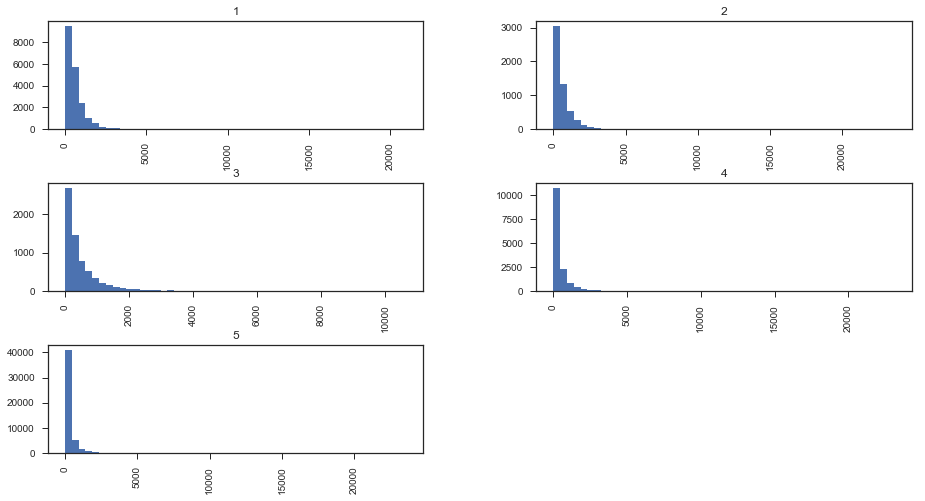

In [15]:
reviews_full.hist(column='length_body', by='star_rating', bins=50, figsize=(15,8))

## Feature 1 - Quantidade de caracteres
#### <i> Analisando os gráficos, é possível identificar que os comentários com menos estrelas possuem mais caracteres no título. Desse modo, acredito que a quantidade de caracteres do titulo e do comentário podem ser features 

# Como identificar a polaridade?

<i> O primeiro desafio é identificar a polaridade dos comentários, acredito que entender o que os clientes falam sobre um determinado produto é de extrema importância para melhorar o fluxo do atendimento e aumentar a fidelização dos clientes. Para essa tarefa irei trabalhar com uma biblioteca baseada em recursos léxicos: </i>

### VADER (Valence Aware Dictionary e Sentiment Reasoner)


<i> É uma biblioteca baseada em recursos léxicos para análise de sentimentos, muito utilizado para redes sociais. As funções dessa biblioteca retornam quão positivo ou negativo é uma sentença. </i>

<i>
<ul>
  <li> Sentimentos Positivos tem o compound >= 0.5 </li>
  <li> Sentimentos Neutros tem o compound >- 0.05 e < 0.05 </li>
  <li> Sentimentos Negativos tem o compound <= -0.05 </li>
</ul>
</i>

In [16]:
# Bibliotecas necessárias para a analise de sentimentos
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [17]:
# Função que retorna o score da polaridade positiva
def sentiment_analyzer_scores_pos(sentence):
    return (analyser.polarity_scores(sentence)['pos'])

# Função que retorna o score da polaridade neutra
def sentiment_analyzer_scores_neu(sentence):
    return (analyser.polarity_scores(sentence)['neu'])

# Função que retorna o score da polaridade negativa
def sentiment_analyzer_scores_neg(sentence):
    return (analyser.polarity_scores(sentence)['neg'])

# Função que retorna o score da polaridade final
def sentiment_analyzer_scores_comp(sentence):
    return (analyser.polarity_scores(sentence)['compound'])

In [18]:
# Aplica a função de polaridade no título
reviews_full['review_headline_pos'] = reviews_full['review_headline'].apply(sentiment_analyzer_scores_pos)
reviews_full['review_headline_neu'] = reviews_full['review_headline'].apply(sentiment_analyzer_scores_neu)
reviews_full['review_headline_neg'] = reviews_full['review_headline'].apply(sentiment_analyzer_scores_neg)
reviews_full['review_headline_comp'] = reviews_full['review_headline'].apply(sentiment_analyzer_scores_comp)

# Aplica a função de polaridade do comentário
reviews_full['review_body_pos'] = reviews_full['review_body'].apply(sentiment_analyzer_scores_pos)
reviews_full['review_body_neu'] = reviews_full['review_body'].apply(sentiment_analyzer_scores_neu)
reviews_full['review_body_neg'] = reviews_full['review_body'].apply(sentiment_analyzer_scores_neg)
reviews_full['review_body_comp'] = reviews_full['review_body'].apply(sentiment_analyzer_scores_comp)


In [19]:
# Verificando as marcações com os comentário e o star_rating
reviews_full[['review_body', 'star_rating', 'review_body_pos', 'review_body_neu', 'review_body_neg', 'review_body_comp']].head(50)

,review_body,star_rating,review_body_pos,review_body_neu,review_body_neg,review_body_comp
0,What a great stove. What a wonderful replacement for my sort of antique. Enjoy it every day.,5,0.472,0.528,0.000,0.8935
1,worked great,5,0.804,0.196,0.000,0.6249
2,Part exactly what I needed. Saved by purchasing myself.,5,0.286,0.714,0.000,0.4215
3,Love my refrigerator! ! Keeps everything cold..will recommend!,5,0.602,0.398,0.000,0.8213
4,No more running to the store for ice! Works perfectly.,5,0.306,0.545,0.150,0.5093
5,It would not cool below 55 degrees and has now stopped working all together. I would NOT recommend this piece of junk to anyone.,1,0.000,0.770,0.230,-0.6088
6,Works awesome for apt size 110 dryer. Handles load from apt size washer just fine. It does take longer to dry. Electric cost savings over a full size 220 is worth the time. Does not add much humidity unless lint filter is full.,5,0.167,0.833,0.000,0.7783
7,exactly what I wanted!,5,0.000,1.000,0.000,0.0000
8,AS advertised,4,0.000,1.000,0.000,0.0000
9,"It works as advertised, but has poor insulation in the top. Like the 3rd shelf, it comes in handy for small/short items.",4,0.191,0.664,0.145,0.0772


#### Correlação do review_body_comp e do star_rating

In [20]:
reviews_full.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,customer_id,product_parent,star_rating,helpful_votes,total_votes,length_headline,length_body,review_headline_pos,review_headline_neu,review_headline_neg,review_headline_comp,review_body_pos,review_body_neu,review_body_neg,review_body_comp
customer_id,1.0,-0.0087,-0.075,0.051,0.052,0.064,0.11,-0.00045,-0.033,0.058,-0.024,-0.11,0.1,0.033,-0.03
product_parent,-0.0087,1.0,-0.013,-0.002,-0.0017,0.0054,-0.0048,-0.0068,0.005,0.0027,-0.0029,-0.017,0.016,0.0036,-0.0033
star_rating,-0.075,-0.013,1.0,-0.04,-0.06,-0.17,-0.16,0.39,-0.12,-0.46,0.51,0.45,-0.32,-0.4,0.58
helpful_votes,0.051,-0.002,-0.04,1.0,0.99,0.072,0.35,0.00098,-0.015,0.024,0.00022,-0.083,0.082,0.018,0.023
total_votes,0.052,-0.0017,-0.06,0.99,1.0,0.075,0.35,-0.0067,-0.013,0.033,-0.01,-0.092,0.088,0.025,0.013
length_headline,0.064,0.0054,-0.17,0.072,0.075,1.0,0.24,-0.095,0.069,0.042,0.04,-0.24,0.23,0.075,-0.059
length_body,0.11,-0.0048,-0.16,0.35,0.35,0.24,1.0,-0.01,-0.045,0.094,-0.029,-0.24,0.24,0.053,0.025
review_headline_pos,-0.00045,-0.0068,0.39,0.00098,-0.0067,-0.095,-0.01,1.0,-0.83,-0.27,0.82,0.082,-0.028,-0.15,0.34
review_headline_neu,-0.033,0.005,-0.12,-0.015,-0.013,0.069,-0.045,-0.83,1.0,-0.32,-0.44,0.056,-0.058,-0.0025,-0.14
review_headline_neg,0.058,0.0027,-0.46,0.024,0.033,0.042,0.094,-0.27,-0.32,1.0,-0.61,-0.23,0.15,0.26,-0.33


## Feature 2 - Polaridade do comentário e do titulo
#### <i> Acredito que o compound possa ser uma feature importante para prever o star_rating, já que a correlação entre eles é bem alta </i>

# Tecnicas de Processamento de Linguagem Natural

<i> O segundo desafio é criar features que me ajudem a prever o rating, isso aumentaria a agilidade e rapidez na identificação e solução dos problemas/dúvidas dos clientes. Trabalhar com dados em formato de texto não é uma tarefa trivial, mas existem muitas técnicas para o Processamento de Linguagem Natural e representação dessa informação para os algoritmos de Machine Learning. 

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

#### Tokenize

<i> Tornar as sentenças em tokens irá me ajudar a trabalhar com todas as palavras que os comentários possuem em todo o conjunto do dataset, isso irá facilitar a manipulação dos dados (exe: "Eu não gostei desse produto" -> ["eu","não","gostei","desse","produto"] </i>

#### Pontuação e letras minusculas

<i> Irei retirar do meu dataset todos os simbulos de pontuação dos comentários e do titulo, para que o algoritmo possa segmentar apenas as palavras relevantes </i>



In [22]:
# Exemplos de caracteres especiais
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### StopWords

<i> StopWords são as palavras que possuem apenas significado sintático dentro das sentenças. Desse modo, irei retirar essas palavras do meu dataset para que os algoritmos não deem importancia para palavras como: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"] </i>

#### Stemming 
<i> Stemming é uma função que diminui a palavra até a sua raiz/base (exe: watches, watching e watched -> watch). Desse modo, irei tratar as palavras originais e suas respectivas derivações de uma mesma maneira.

In [24]:
# Funcção que retira aplica as tecnicas citadas acima

def text_process(reviews):
    # Retira as pontuações + Tokenize
    nopunc = [char for char in reviews if char not in string.punctuation]

    # Junta para formar strings
    nopunc = ''.join(nopunc)
    split = nopunc.split()
    
    # Remove as stopwords
    nostopword = [word for word in split if word.lower() not in stopwords.words('english')]
    
    # Altera todas as letras para minusculo
    wordsmin = [word.lower() for word in nostopword] 
    
    # Transforma cada palavra para o seu radical
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    return [stemmer.stem(word) for word in wordsmin]


In [25]:
# Aplica a função de remoção de stopword e pontuação no titulo e no comentário
reviews_full['review_headline_words'] = reviews_full['review_headline'].apply(text_process)
reviews_full['review_body_words'] = reviews_full['review_body'].apply(text_process)

reviews_full[['review_headline', 'review_headline_words']].head(10)

,review_headline,review_headline_words
0,"If you need a new stove, this is a winner.","[need, new, stove, winner]"
1,Five Stars,"[five, star]"
2,Fast Shipping,"[fast, ship]"
3,Five Stars,"[five, star]"
4,Five Stars,"[five, star]"
5,Piece of Junk,"[piec, junk]"
6,Works awesome for apt size 110 dryer,"[work, awesom, apt, size, 110, dryer]"
7,Five Stars,"[five, star]"
8,Four Stars,"[four, star]"
9,but has poor insulation in the top,"[poor, insul, top]"


### Depois de todo o tratamento dos comentário é possível criar uma Word Cloud para verificar a possibilidade de criar um "bag of words" com os bigramas mais frequentes

# Word Cloud

<i> Nuvem de palavras com os tokens e os bigramas mais frequentes para os clientes que tiveram o compound na faixa das polaridades negativas, neutras e positivas. Com a ajuda dessa visualização fica mais fácil identificar quais os bigramas que fazem mais sentido para cada faixa. <i>

In [26]:
# Bibliotecas necessarias
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from operator import itemgetter
from wordcloud import WordCloud

In [27]:
# Função que transforma as informações das colunas em uma lista unica
def list_words(words):
    
    # transforma a serie em uma lista para aplicar a função de frequencia
    words_list = words.tolist()
    
    # retira da lista os ([])
    words_list = [val for sublist in words_list for val in sublist]
    
    # coloca todas as palavras em caixa baixa
    words_list = [item.lower() for item in words_list]
    
    # retorna a frequencia de cada palavra
    return words_list

# Função que retorna a word cloud dos bigramas 
def show_wordcloud_bi(palavras):

    lista_words = list_words(palavras)

    # identifica os bigramas e a frequencia com que eles aparecem nos textos
    finder = BigramCollocationFinder.from_words(lista_words)
    bigram_measures = BigramAssocMeasures()
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    scoredList = sorted(scored, key=itemgetter(1), reverse=True)

    word_dict = {}

    listLen = len(scoredList)
    
    scoredList
    # Cria um dicionario com os bigramas e a frequencia deles 
    for i in range(listLen):
        word_dict[' '.join(scoredList[i][0])] = scoredList[i][1]

    # Passa o dicionario com os bigramas para a geração da word cloud
    wordCloud = WordCloud(background_color='white',max_font_size=40,scale=3,random_state=1)
    wordCloud.generate_from_frequencies(word_dict)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')   
    plt.imshow(wordCloud)
    plt.show()

# Função que cria a word cloud dos tokens
def show_wordcloud_uni(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show() 

In [28]:
reviews_full.head(1)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,length_headline,length_body,review_headline_pos,review_headline_neu,review_headline_neg,review_headline_comp,review_body_pos,review_body_neu,review_body_neg,review_body_comp,review_headline_words,review_body_words
0,US,16199106,R203HPW78Z7N4K,B0067WNSZY,633038551,"FGGF3032MW Gallery Series 30"" Wide Freestanding Gas Range 5 Sealed Burners Easy Temperature Probe Express-Select Controls One-Touch Self Clean:",Major Appliances,5,0,0,N,Y,"If you need a new stove, this is a winner.",What a great stove. What a wonderful replacement for my sort of antique. Enjoy it every day.,2015-08-31,42,94,0.352,0.648,0.0,0.5859,0.472,0.528,0.0,0.8935,"[need, new, stove, winner]","[great, stove, wonder, replac, sort, antiqu, enjoy, everi, day]"


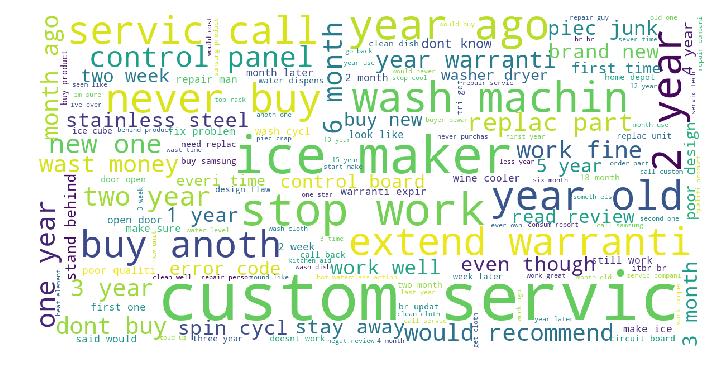

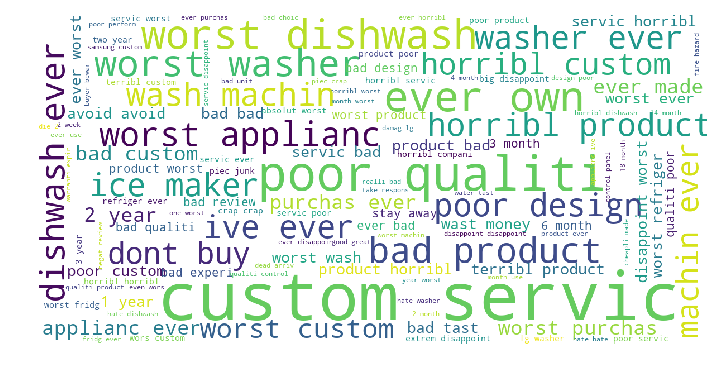

In [29]:
# WordCloud Negativos
show_wordcloud_bi(reviews_full['review_body_words'][reviews_full['review_body_comp'] <= -0.5])
show_wordcloud_bi(reviews_full['review_headline_words'][reviews_full['review_headline_comp'] <= -0.5])

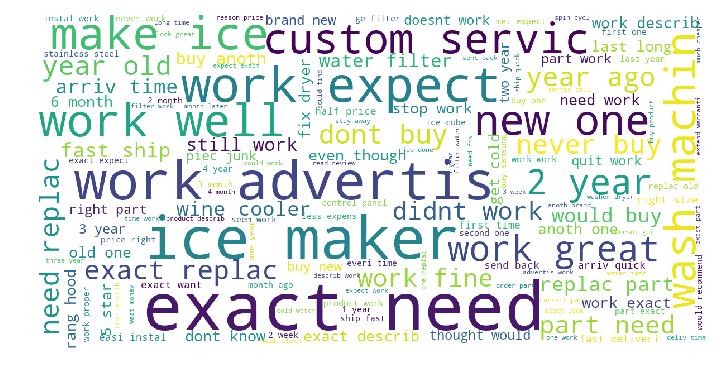

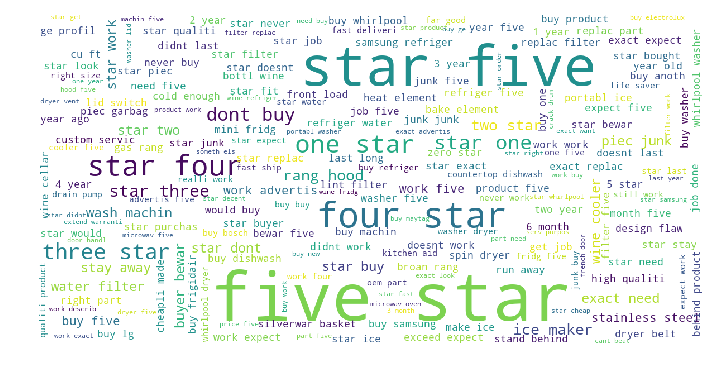

In [30]:
# WordCloud Neutros
show_wordcloud_bi(reviews_full['review_body_words'][(reviews_full['review_body_comp'] >= -0.05) & (reviews_full['review_body_comp'] < 0.05)])
show_wordcloud_bi(reviews_full['review_headline_words'][(reviews_full['review_headline_comp'] >= -0.05) & (reviews_full['review_headline_comp'] < 0.05)])

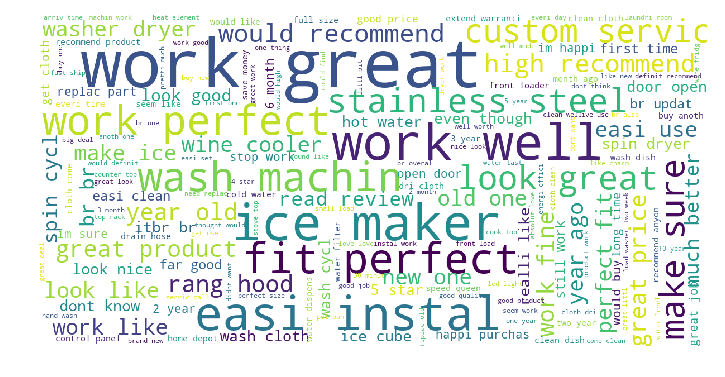

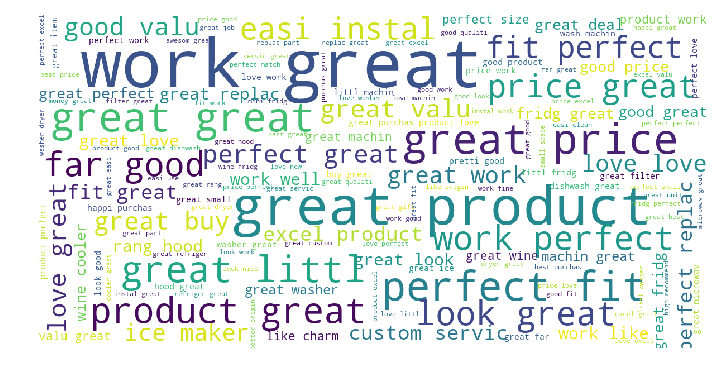

In [31]:
# WordCloud Positivos
show_wordcloud_bi(reviews_full['review_body_words'][reviews_full['review_body_comp'] >= 0.5])
show_wordcloud_bi(reviews_full['review_headline_words'][reviews_full['review_headline_comp'] >= 0.5])

## Feature 3 - Bag of Words dos bigramas mais frequentes para polaridade positiva, negativa e neutra do comentário e do titulo
#### <i> Pela nuvem de palavras é possivel identificar que alguns bigramas realmente descrevem os sentimentos dos clientes, acredito que essa seleção de palavras mais frequentes me ajude a representar os textos </i>

### Bag of Words

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Função que adiciona as colunas com os bigramas e as frequencias na base
def bag_of_words_bigram(baseOrig, base, prefix):

    # transforma a coluna em uma lista unica
    sent = []
    for row in base:
        sequ = ''
        for word in row:
            sequ = sequ + ' ' + word
        sent.append(sequ)

    final_X = sent
    
    # função responsavel por gerar o bigrama
    bow_transformer = CountVectorizer(max_features=50, ngram_range=(2,2)).fit(final_X)
    X = bow_transformer.fit_transform(final_X) 
    
    # cria uma tabela com as colunas e adiciona um prefixo no nome das colunas
    count_vect_df = pd.DataFrame(X.todense(), columns=bow_transformer.get_feature_names())
    count_vect_df2 = count_vect_df.add_prefix(prefix)

    # junta a base historica com as novas palavras
    base1 = pd.concat([baseOrig, count_vect_df2], axis=1)
    
    # substitui os valores nulos por 0
    baseFinal = base1.fillna(0)
    return baseFinal

In [33]:
# Inclui o bigrama com as palavras negativas
reviews_full_v1 = bag_of_words_bigram(reviews_full,reviews_full['review_body_words'][reviews_full['review_body_comp'] <= -0.5], 'neg_')
reviews_full_v2 = bag_of_words_bigram(reviews_full_v1,reviews_full['review_headline_words'][reviews_full['review_headline_comp'] <= -0.5], 'neg_head_')


# Inclui o bigrama com as palavras neutras
reviews_full_v3 = bag_of_words_bigram(reviews_full_v2,reviews_full['review_body_words'][(reviews_full['review_body_comp'] >= -0.05) & (reviews_full['review_body_comp'] < 0.05)], 'neu_')
reviews_full_v4 = bag_of_words_bigram(reviews_full_v3,reviews_full['review_headline_words'][(reviews_full['review_headline_comp'] >= -0.05) & (reviews_full['review_headline_comp'] < 0.05)], 'neu_head_')

# Inclui o bigrama com as palavras positivas
reviews_full_v5 = bag_of_words_bigram(reviews_full_v4, reviews_full['review_body_words'][reviews_full['review_body_comp'] >= 0.5], 'pos_')
reviews_full_v6 = bag_of_words_bigram(reviews_full_v5, reviews_full['review_headline_words'][reviews_full['review_headline_comp'] >= 0.5], 'pos_head_')

# Modelos

## Conjunto de treinamento e teste com todas as features criadas no trabalho (bag of words, polaridade e quantidade de caracteres)

In [35]:
# Exclui as informações que não serão usadas na modelagem
X = reviews_full_v6.drop(['review_headline_words','review_body_words','marketplace','customer_id','review_id','product_id','product_parent','product_title','product_category','star_rating','helpful_votes','total_votes','vine','verified_purchase','review_headline','review_body','review_date'],axis=1)                   

# Label -> Star_rating
y = reviews_full_v6["star_rating"]
                   
# Separação do conjunto de teste e treinamento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Naive Bayes 

In [36]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Calculo da acuracia
acc_log = round(classifier.score(X_train, y_train) * 100, 2)
acc_log

17.08

In [37]:
from sklearn.metrics import confusion_matrix
print (pd.crosstab(y_test, classifier.predict(X_test), rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito  0.0   1.0    2.0   3.0   4.0   5.0    All
Real                                              
0.0        2     0      1     0     0     0      3
1.0        0   817   3449   283   145   254   4948
2.0        0   176   1022    74    47    77   1396
3.0        0   116   1224   108    99   104   1651
4.0        0   155   2647   252   439   329   3822
5.0        0   365   7125   931  2503  1465  12389
All        2  1629  15468  1648  3233  2229  24209


## SVM

In [38]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_predSVM = Model.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Calculo da acuracia
acc_log = round(Model.score(X_train, y_train) * 100, 2)
acc_log


61.65

In [39]:
print (pd.crosstab(y_test, Model.predict(X_test), rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito   1.0  2.0  3.0  4.0    5.0    All
Real                                      
0.0         0    0    0    0      3      3
1.0      2883    2    6   21   2036   4948
2.0       630    0    1    5    760   1396
3.0       461    3    6    9   1172   1651
4.0       541    2    1   13   3265   3822
5.0       868    2    1   21  11497  12389
All      5383    9   15   69  18733  24209


## KNN

In [52]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=5)
Model.fit(X_train, y_train)

y_predKN = Model.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Calculo da acuracia
acc_log = round(Model.score(X_train, y_train) * 100, 2)
acc_log

67.58

In [53]:
print (pd.crosstab(y_test, Model.predict(X_test), rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     1    2    3     4      5    All
Real                                       
1        2843  202  225   439   1285   4994
2         606  114   60   135    408   1323
3         499   54  221   197    642   1613
4         691   81  134   425   2501   3832
5        1451  174  317  1189   9314  12445
All      6090  625  957  2385  14150  24207


## Conjunto de treinamento e teste com sem a feature de bag of words

In [40]:
X = reviews_full.drop(['review_headline_words','review_body_words','marketplace','customer_id','review_id','product_id','product_parent','product_title','product_category','star_rating','helpful_votes','total_votes','vine','verified_purchase','review_headline','review_body','review_date'],axis=1)                   
y = reviews_full["star_rating"]

# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Naive Bayes 

In [41]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Calculo da acuracia
acc_log = round(classifier.score(X_train, y_train) * 100, 2)
acc_log

60.87

In [42]:
print (pd.crosstab(y_test, classifier.predict(X_test), rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     1    2    3     4      5    All
Real                                       
1        4072   37  142   129    614   4994
2         903   21   65    62    272   1323
3         756   18   57   105    677   1613
4         673   32  102   327   2698   3832
5        1306   37  209   569  10324  12445
All      7710  145  575  1192  14585  24207


## SVM

In [43]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_predSVM = Model.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Calculo da acuracia
acc_log = round(Model.score(X_train, y_train) * 100, 2)
acc_log

71.15

In [44]:
print (pd.crosstab(y_test, Model.predict(X_test), rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     1    2    3    4      5    All
Real                                      
1        2831   24   33   84   2022   4994
2         565   54    9   28    667   1323
3         418    3  157   32   1003   1613
4         479   10   14   66   3263   3832
5         915   10   53  155  11312  12445
All      5208  101  266  365  18267  24207


## KNN

In [50]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=5)
Model.fit(X_train, y_train)

y_predKN = Model.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Calculo da acuracia
acc_log = round(Model.score(X_train, y_train) * 100, 2)
acc_log

67.58

In [51]:
print (pd.crosstab(y_test, Model.predict(X_test), rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     1    2    3     4      5    All
Real                                       
1        2843  202  225   439   1285   4994
2         606  114   60   135    408   1323
3         499   54  221   197    642   1613
4         691   81  134   425   2501   3832
5        1451  174  317  1189   9314  12445
All      6090  625  957  2385  14150  24207


## Conclusão

<i> Para a predição do star_rating utilizei o Naive Bayes, SVM e KNN em dois conjuntos de dados. Separei em dois conjuntos de dados porque eu acredito que a feature de bag of words pode ter criado muitos dados com ruídos que atrapalham o modelo.

O SVM acabou tendo a melhor acuracia para os dois conjuntos, no segundo caso de testes (sem a feature bag of words) chega a ser a maior de todos os treinamentos que é 71.15. Provavelmente eu acabaria utilizando ele no dia a dia, mas poderia testar outros datasets para verificar se a acuracia se mantem.